In [640]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from scipy import stats
import seaborn as sns
import statistics
import re
import nltk
from nltk.corpus import stopwords
from pandas.plotting import parallel_coordinates


# Phase 1-4

In [641]:
df_ps = pd.read_csv('Playstore_final.csv')
df_ps = df_ps.iloc[:, 0:29]
df_ps

C:\Users\mashadservice\AppData\Local\Temp\ipykernel_17376\2825289777.py:1: DtypeWarning: Columns (7,12,29,30,33,35,37,38,40,42,43,44,46,47,48,49,50,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ps = pd.read_csv('Playstore_final.csv')


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,...,Ad Supported,In app purchases,Editor Choice,Summary,Reviews,Android version Text,Developer,Developer Address,Developer Internal ID,Version
0,Logistics Management,com.eniseistudio.logistics_management,Education,4.090909,66.0,"10,000+",10000.0,True,0.0,USD,...,True,False,False,Leading Online Learning and Training System in...,28.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.660000e+18,1.1.5
1,Estados Unidos Noticias,com.eniseistudio.news.estados_unidos,News & Magazines,4.000000,8.0,"1,000+",1000.0,True,0.0,USD,...,True,False,False,Top Stories\r\nWorld\r\nEntertainment\r\nSport...,3.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.660000e+18,1.2.3
2,Dental Assistant,com.eniseistudio.dental_assistant,Education,3.866667,15.0,"10,000+",10000.0,True,0.0,USD,...,True,False,False,"Dental Assistant: Study Dental Assistant, Dent...",3.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.660000e+18,1.1.5
3,Medical Assistant,com.eniseistudio.course.medical_assistant,Education,4.000000,18.0,"5,000+",5000.0,True,0.0,USD,...,True,False,False,Medical Assistant Degree Medical Assistant Job...,7.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.660000e+18,1.1.4
4,Business Administration,com.eniseistudio.majors.course.business_admini...,Education,4.023256,86.0,"50,000+",50000.0,True,0.0,USD,...,True,False,False,"Business Administration Learning, Business Adm...",29.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.660000e+18,1.1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450789,Punjabi Keyboard,com.fancy.fontforu.punjabikeyboard,Productivity,4.240000,875.0,"100,000+",100000.0,True,0.0,USD,...,True,False,False,Pubjabi keyboard app which allow you to type i...,257.0,4.1 and up,Fancy Font For U,NaN,5.360000e+18,13
450790,Live 4D Wallpaper 2020 : 4K Live Backgrounds,com.fancy.hdwallpaper.parallaxbackgroundhd,Personalization,2.961539,52.0,"10,000+",10000.0,True,0.0,USD,...,NaN,False,False,Unlimited Live 4D Wallpapers collection to dec...,26.0,4.2 and up,Fancy Font For U,NaN,5.360000e+18,1
450791,Rap Music Maker : Rap Beats Music Recording St...,com.fancy.rapmusicmakerstudio,Music & Audio,3.500000,64.0,"10,000+",10000.0,True,0.0,USD,...,True,False,False,Rap Music Maker will used to make your own rap...,41.0,5.0 and up,Fancy Font For U,NaN,5.360000e+18,2.3
450792,Meetz - Cloud Meetings and Classes,org.ssz.meet,Communication,NaN,NaN,"5,000+",5000.0,True,0.0,USD,...,NaN,False,False,Virtual meetings for everyone,NaN,Varies with device,INVENTRIX,NaN,7.190000e+18,Varies with device


In [642]:
df_gp = pd.read_csv('GooglePlay.csv')
df_gp = df_gp.iloc[:, 1:]
df_gp

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


## Part 1

In [643]:
merged_df = pd.merge(df_ps, df_gp, left_on= 'App Name', right_on= 'App', how= 'inner')
del merged_df['App']
merged_df

,App Name,App Id,Category_x,Rating_x,Rating Count,Installs_x,Minimum Installs,Free,Price_x,Currency,...,Reviews_y,Size_y,Installs_y,Type,Price_y,Content Rating_y,Genres,Last Updated,Current Ver,Android Ver
0,Montessori Preschool,com.edokicademy.montessoriacademy,Education,3.904025,3219.0,"1,000,000+",1000000.0,True,0.00,USD,...,237,26M,"100,000+",Free,0,Everyone,Education;Education,12-Jul-18,1.7.2,4.1 and up
1,ABC Kids - Tracing & Phonics,com.rvappstudios.abc_kids_toddler_tracing_phonics,Educational,4.283004,62518.0,"10,000,000+",10000000.0,True,0.00,USD,...,36606,Varies with device,"10,000,000+",Free,0,Everyone,Educational;Education,22-Jun-18,Varies with device,4.0 and up
2,Puzzle Kids - Animals Shapes and Jigsaw Puzzles,com.rvappstudios.jigsaw.puzzles.kids,Educational,4.197051,14797.0,"10,000,000+",10000000.0,True,0.00,USD,...,1109,52M,"1,000,000+",Free,0,Everyone,Educational;Brain Games,18-Jul-18,1.0.6,4.1 and up
3,Learn to Read with Tommy Turtle,com.intellijoy.android.reading.free,Educational,4.289062,21762.0,"5,000,000+",5000000.0,True,0.00,USD,...,20763,Varies with device,"5,000,000+",Free,0,Everyone,Educational;Education,6-Mar-18,3.6.17,2.3 and up
4,Learn to Read with Tommy Turtle,com.intellijoy.android.reading,Educational,4.290598,1172.0,"100,000+",100000.0,False,2.99,USD,...,20763,Varies with device,"5,000,000+",Free,0,Everyone,Educational;Education,6-Mar-18,3.6.17,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,350 Diy Room Decor Ideas,com.diy_room_decor.dev3,Art & Design,3.610000,101.0,"50,000+",50000.0,True,0.00,USD,...,27,17M,"10,000+",Free,0,Everyone,Art & Design,7-Nov-17,1,2.3 and up
6246,Doll House Design & Decoration 2: Girls House ...,com.sablo.dollhouse.design2,Simulation,3.777624,7149.0,"1,000,000+",1000000.0,True,0.00,USD,...,2338,45M,"100,000+",Free,0,Everyone,Simulation,29-May-18,1.1,4.1 and up
6247,ES-1,com.dygsm.es1,Tools,0.000000,NaN,500+,500.0,True,0.00,USD,...,6,2.7M,500+,Free,0,Everyone,Communication,5-Jul-16,1,1.6 and up
6248,Binaural Beats Meditation,com.app.binaural_wavess,Libraries & Demo,4.314286,70.0,"100,000+",100000.0,True,0.00,USD,...,411,95M,"50,000+",Free,0,Everyone,Libraries & Demo,8-Jun-18,5,4.0.3 and up


## Part 2

### Correct Inconsistencies

In method 1, if values of 'Category_x' column and 'Category_y' column are the same, we fill the column with that value otherwise with 'Category_x' which is from refernce dataset.In Method 2, we preprocess the 'Category_x' and 'Category_y' columns and compare them. If they are equal, we copy the value in the 'Category' column; otherwise, we fill it with None.

In [644]:
#method 1
merged_df['Category'] = merged_df['Category_x']
#method 2
# tmp_category_x = merged_df['Category_x'].str.replace('&', '').str.replace(' ', '').str.lower()
# tmp_category_y = merged_df['Category_y'].str.replace('AND', '').str.replace('_', '').str.lower()
# merged_df['Category'] = np.where(tmp_category_x == tmp_category_y, merged_df['Category_x'], None)

del merged_df['Category_x']
del merged_df['Category_y']

we preprocess Price_y column and convert it to numeric values without signs like $ then we compared Price_x and Price_y, if they are equal, we copy the value in the Price column otherwise copy their mean value.

In [645]:
merged_df['Price_y'] = pd.to_numeric(merged_df['Price_y'].str.replace('$',''))
merged_df['Price'] = np.where(merged_df['Price_x'] == merged_df['Price_y'], merged_df['Price_x'], (merged_df['Price_x'] + merged_df['Price_y']) / 2)
del merged_df['Price_x']
del merged_df['Price_y']

'Type' and 'Free' columns are compared together, if there are inconsistencies between them, based
 on 'Price' field, we recognize its origin value. if price field doesn't have valid value, we replace it with
 'unknown'.  

In [646]:
indices1 = merged_df[(merged_df['Free'] == True) & (merged_df['Type'] == 'Paid')].index
indices2 = merged_df[(merged_df['Free'] == False) & (merged_df['Type'] == 'Free')].index
merged_df.loc[merged_df.index.isin(indices1) & (merged_df['Price'] == 0), 'Type'] = 'Free'
merged_df.loc[merged_df.index.isin(indices2) & (merged_df['Price'] > 0), 'Type'] = 'Paid'
del merged_df['Free']

we compare Rating_x and Rating_y, if they are equal, we copy the value in the Rating column otherwise copy their mean value (that is done using mean). if one of Rating_x or Rating_y columns has null value, we fill it with the other numeric value.

In [647]:
merged_df.loc[(merged_df['Rating_x'].isnull()) & (merged_df['Rating_y'].isnull() == False), 'Rating'] = merged_df['Rating_y']
merged_df.loc[(merged_df['Rating_y'].isnull()) & (merged_df['Rating_x'].isnull() == False), 'Rating'] = merged_df['Rating_x']
merged_df.loc[(merged_df['Rating_x'].isnull() == False) &
              (merged_df['Rating_y'].isnull() == False), 'Rating'] = (merged_df['Rating_x'] + merged_df['Rating_y']) / 2
del merged_df['Rating_x']
del merged_df['Rating_y']

we preprocess Installs_x and Installs_y column and convert it to numeric values then we compare Installs_x and Installs_y, if they are equal, we copy the value in the Installs column otherwise copy their mean value.

In [648]:
merged_df['Installs_x'] = merged_df['Installs_x'].str.replace('+','')
merged_df['Installs_x'] = merged_df['Installs_x'].str.replace(',','')
merged_df['Installs_y'] = merged_df['Installs_y'].str.replace('+','')
merged_df['Installs_y'] = merged_df['Installs_y'].str.replace(',','')
merged_df['Installs_x'] = pd.to_numeric(merged_df['Installs_x'])
merged_df['Installs_y'] = pd.to_numeric(merged_df['Installs_y'])



merged_df.loc[(merged_df['Installs_x'].isnull()) & (merged_df['Installs_y'].isnull() == False), 'Installs'] = merged_df['Installs_y']
merged_df.loc[(merged_df['Installs_y'].isnull()) & (merged_df['Installs_x'].isnull() == False), 'Installs'] = merged_df['Installs_x']
merged_df.loc[(merged_df['Installs_x'].isnull() == False) &
              (merged_df['Installs_y'].isnull() == False), 'Installs'] = (merged_df['Installs_x'] + merged_df['Installs_y']) / 2

# merged_df[['Installs', 'Installs_x', 'Installs_y']]
del merged_df['Installs_x']
del merged_df['Installs_y']


we get indices where its value is 'Varies with device' then preprocess Size_x and Size_y column and convert it to equivalent numeric values (remove k, M, G, ...) then we compare Size_x and Size_y, if they are equal, copy the value in the Size column otherwise copy their mean value that is done by calculating mean values.if one of record's value is null, we fill Size column with the other numeric value and if at least one of record's value is 'Varies with device', then we fill Size record with the mean of other Size values.

In [649]:
def convert_size(size_str):
    pattern = re.compile(r'(\d+)([GgMmkK])', re.IGNORECASE)
    match = pattern.search(size_str)
    
    if match:
        num = float(match.group(1))
        unit = match.group(2).upper()
        if unit == 'G' or unit == 'g':
            return num * 1000000000  # 1 GB 
        elif unit == 'M' or unit == 'm':
            return num * 1000000  # 1 MB 
        elif unit == 'k' or unit == 'K':
            return num * 1000  # 1 KB
    else:
        return float(size_str)

In [650]:
varies_indices = merged_df[(merged_df['Size_x'] == 'Varies with device') | (merged_df['Size_y'] == 'Varies with device')].index

merged_df.loc[merged_df['Size_x'] == 'Varies with device', 'Size_x'] = '0' # preprocess for size_conversion
merged_df.loc[merged_df['Size_y'] == 'Varies with device', 'Size_y'] = '0' # preprocess for size_conversion

merged_df['Size_x'] = merged_df['Size_x'].apply(convert_size)
merged_df['Size_y'] = merged_df['Size_y'].apply(convert_size)


merged_df.loc[(merged_df['Size_x'].isnull()) & (merged_df['Size_y'].isnull() == False), 'Size'] = merged_df['Size_y']
merged_df.loc[(merged_df['Size_y'].isnull()) & (merged_df['Size_x'].isnull() == False), 'Size'] = merged_df['Size_x']
merged_df.loc[(merged_df['Size_x'].isnull() == False) &
              (merged_df['Size_y'].isnull() == False), 'Size'] = (merged_df['Size_x'] + merged_df['Size_y']) / 2

filtered_size = merged_df.drop(merged_df.index[varies_indices])['Size']

merged_df.loc[(merged_df['Size_x'].isnull()) & (merged_df['Size_y'].isnull()), 'Size'] = filtered_size.mean()


# merged_df.loc[varies_indices, 'Size'] = 'Varies with device'
merged_df.loc[varies_indices, 'Size'] = filtered_size.mean()
del merged_df['Size_x']
del merged_df['Size_y']

In method 1, if values of Content Rating_x column and Content Rating_y column are the same, we fill the column with that value otherwise with Content Rating_x which is from refernce dataset.In method 2, we compare Content Rating_x and Content Rating_y , if they are equal, we copy the value in the Content Rating column otherwise we choose more limited value. we create a list of content_ratings which is sorted based on limitations and then we check the index of Content Rating_x or Content Rating_y in content_ratings list to get its limitation level. 

In [651]:
# method 1
merged_df['Content Rating'] = merged_df['Content Rating_x']

# method 2
# content_ratings = ['Teen','Adults only 18+','Mature 17+','Everyone 10+','Everyone','Unrated']
# merged_df['Content Rating'] = np.where(
#     merged_df['Content Rating_x'].equals(merged_df['Content Rating_y']),
#     merged_df['Content Rating_x'],
#     [content_ratings[min(content_ratings.index(x), content_ratings.index(y))] for x, y in zip(merged_df['Content Rating_x'], merged_df['Content Rating_y'])]
# )
del merged_df['Content Rating_x']
del merged_df['Content Rating_y']

we compare Reviews_x and Reviews_y, if they are equal, we copy the value in the Reviews column otherwise copied their mean value (that is done using mean). if one of Reviews_x or Reviews_y columns has null value, we fill it with the other numeric value.

In [652]:
merged_df.loc[(merged_df['Reviews_x'].isnull()) & (merged_df['Reviews_y'].isnull() == False), 'Reviews'] = merged_df['Reviews_y']
merged_df.loc[(merged_df['Reviews_y'].isnull()) & (merged_df['Reviews_x'].isnull() == False), 'Reviews'] = merged_df['Reviews_x']
merged_df.loc[(merged_df['Reviews_x'].isnull() == False) &
              (merged_df['Reviews_y'].isnull() == False), 'Reviews'] = (merged_df['Reviews_x'] + merged_df['Reviews_y']) / 2
del merged_df['Reviews_x']
del merged_df['Reviews_y']

we compare Last update and Last Updated, if they are equal, we keep values in Last update column and  if Last update has null value, copy Last Updated value in Last update column otherwise we keep reference value that is Last update

In [653]:
merged_df.loc[(merged_df['Last update'].isnull()) & (merged_df['Last Updated'].isnull() == False), 'Last update'] = merged_df['Last Updated']
del merged_df['Last Updated']

## Part 3

To create Popularity attribute, we select records where their Rating is higher than 4, their Editor Choice is
True and their Type is free and set True value for them otherwise False value.

In [654]:
# Popularity 
merged_df['Popularity'] = np.where((merged_df['Rating'] >= 4) &
                                   merged_df['Editor Choice'] &
                                   (merged_df['Type'] == 'Free'), True, False)

To create User Engagement attribute, we calculate its score that is between 1 to 10 based on Reviws, Ratings and Installs. we set their weights to 2, 4, 4 accordingly and then add them.

In [655]:
# User Engagement
# reviews weight 2
tmp_reviews = ((merged_df['Reviews'] - merged_df['Reviews'].min()) / (merged_df['Reviews'].max() - merged_df['Reviews'].min())) * 2

# rating weight 4
tmp_ratings = ((merged_df['Rating'] - merged_df['Rating'].min()) / (merged_df['Rating'].max() - merged_df['Rating'].min())) * 4

# installs weight 4
tmp_installs = ((merged_df['Installs'] - merged_df['Installs'].min()) / (merged_df['Installs'].max() - merged_df['Installs'].min())) * 4

# between 0 to 10
merged_df['User Engagement'] = tmp_reviews + tmp_ratings + tmp_installs


To create Performance attribute, we calculate its score that is between 1 to 10 based on Size, Currentness (the older apps have higher score), Ratings and Installs. we set their weights to 3, 3, 3, 1 accordingly and then add them. 

In [656]:
# Performance

# size weight 3
tmp_size = ((merged_df['Size'] - merged_df['Size'].min()) / (merged_df['Size'].max() - merged_df['Size'].min())) * 3

# currentness weight 3
tmp_last_update = pd.to_datetime(merged_df['Last update'], format='%d-%b-%y', errors='coerce')
tmp_last_update_year = tmp_last_update.dt.year
tmp_last_update_score = ((tmp_last_update_year - tmp_last_update_year.min()) / (tmp_last_update_year.max() - tmp_last_update_year.min())) * 3
tmp_last_update_score = 3 - tmp_last_update_score

# ratings weight 3
tmp_ratings = ((merged_df['Rating'] - merged_df['Rating'].min()) / (merged_df['Rating'].max() - merged_df['Rating'].min())) * 3

# installs weight 1
tmp_installs = (merged_df['Installs'] - merged_df['Installs'].min()) / (merged_df['Installs'].max() - merged_df['Installs'].min())

merged_df['Performance'] = tmp_size + tmp_last_update_score + tmp_ratings + tmp_installs


Life time attribute is between 0 to 5. Older attributes have more values.

In [657]:
# Life time
tmp_life_time = pd.to_datetime(merged_df['Last update'], format='%d-%b-%y', errors='coerce')
tmp_life_time_year = tmp_life_time.dt.year
tmp_life_time_score = ((tmp_life_time_year - tmp_life_time_year.min()) / (tmp_life_time_year.max() - tmp_life_time_year.min())) * 5
merged_df['Life time'] = tmp_life_time_score

# Phase 1-3

## Part 1

### Handle Missing Values

In [658]:
merged_df.loc[merged_df['App Name'].isnull(), 'App Name'] = 'unknown'

merged_df.loc[merged_df['App Id'].isnull(), 'App Id'] = 'unknown'

merged_df.loc[merged_df['Rating Count'].isnull(), 'Rating Count'] = merged_df['Rating Count'].mean()

merged_df.loc[merged_df['Minimum Installs'].isnull(), 'Minimum Installs'] = merged_df['Minimum Installs'].mean()

merged_df.loc[merged_df['Currency'].isnull(), 'Currency'] = merged_df['Currency'].mode()[0]

ma_tmp = df_ps['Minimum Android'].str.replace('[a-zA-Z ]', '', regex=True).replace('', np.nan).dropna()
minimum_android_mean = pd.to_numeric(ma_tmp.apply(lambda x: x.split('.')[0])).mean()
merged_df.loc[merged_df['Minimum Android'].isnull(), 'Minimum Android'] = minimum_android_mean

merged_df.loc[merged_df['Developer Id'].isnull(), 'Developer Id'] = 'unknown'

merged_df.loc[merged_df['Developer Website'].isnull(), 'Developer Website'] = 'unknown'

merged_df.loc[merged_df['Developer Email'].isnull(), 'Developer Email'] = 'unknown'

merged_df.loc[merged_df['Released'].isnull(), 'Released'] = 'unknown'

merged_df.loc[merged_df['Last update'].isnull(), 'Last update'] = 'unknown'

merged_df.loc[merged_df['Privacy Policy'].isnull(), 'Privacy Policy'] = 'unknown'

merged_df.loc[merged_df['Ad Supported'].isnull(), 'Ad Supported'] = merged_df['Ad Supported'].mode()[0]

merged_df.loc[merged_df['In app purchases'].isnull(), 'In app purchases'] = merged_df['In app purchases'].mode()[0]

merged_df.loc[merged_df['Editor Choice'].isnull(), 'Editor Choice'] = merged_df['Editor Choice'].mode()[0]

merged_df.loc[merged_df['Summary'].isnull(), 'Summary'] = 'unknown'

avt_tmp = merged_df['Android version Text'].str.replace('[a-zA-Z ]', '', regex=True).replace('', np.nan).dropna()
android_version_text_mean = pd.to_numeric(avt_tmp.apply(lambda x: x.split('.')[0])).mean()
merged_df.loc[merged_df['Android version Text'].isnull(), 'Android version Text'] = str(android_version_text_mean) + ' and up'

merged_df.loc[merged_df['Developer'].isnull(), 'Developer'] = 'unknown'

merged_df.loc[merged_df['Developer Address'].isnull(), 'Developer Address'] = 'unknown'

merged_df.loc[merged_df['Developer Internal ID'].isnull(), 'Developer Internal ID'] = 'unknown'

v_tmp = merged_df['Version'].str.replace('[a-zA-Z ()_-]', '', regex=True).replace('', np.nan).dropna()
version_mean = pd.to_numeric(v_tmp.apply(lambda x: x.split('.')[0])).mean()
merged_df.loc[merged_df['Version'].isnull(), 'Version'] = version_mean

merged_df.loc[merged_df['Type'].isnull(), 'Type'] = 'unknown'

merged_df.loc[merged_df['Genres'].isnull(), 'Genres'] = 'unknown'

merged_df.loc[merged_df['Last update'].isnull(), 'Last update'] = 'unknown'

merged_df.loc[merged_df['Current Ver'].isnull(), 'Current Ver'] = 'unknown'

av_tmp = merged_df['Android Ver'].str.replace('[a-zA-Z ]', '', regex=True).replace('', np.nan).dropna()
android_version_mean = pd.to_numeric(av_tmp.apply(lambda x: x.split('.')[0])).mean()
merged_df.loc[merged_df['Android Ver'].isnull(), 'Android Ver'] = str(android_version_mean) + ' and up'

merged_df.loc[merged_df['Rating'].isnull(), 'Rating'] = merged_df['Rating'].mean()

merged_df.loc[merged_df['Installs'].isnull(), 'Installs'] = merged_df['Installs'].mean()

merged_df.loc[merged_df['Price'].isnull(), 'Price'] = merged_df['Price'].mean()

merged_df.loc[merged_df['Reviews'].isnull(), 'Reviews'] = merged_df['Reviews'].mean()


## Part 2

### Data Conversion

In [659]:
## Rating 0-1
norm_ratings = ((merged_df['Rating'] - merged_df['Rating'].min()) / (merged_df['Rating'].max() - merged_df['Rating'].min()))

## Rating Count 0-100
norm_rating_count = ((merged_df['Rating Count'] - merged_df['Rating Count'].min()) / (merged_df['Rating Count'].max() - merged_df['Rating Count'].min())) * 100

## Minimum Installs 0-100
norm_minimum_installs = ((merged_df['Minimum Installs'] - merged_df['Minimum Installs'].min()) / (merged_df['Minimum Installs'].max() - merged_df['Minimum Installs'].min())) * 100

## Installs 0-100
norm_installs= ((merged_df['Installs'] - merged_df['Installs'].min()) / (merged_df['Installs'].max() - merged_df['Installs'].min())) * 100

## Reviews 0-100
norm_reviews = ((merged_df['Reviews'] - merged_df['Reviews'].min()) / (merged_df['Reviews'].max() - merged_df['Reviews'].min())) * 100

## Size 0-100
norm_size = ((merged_df['Size'] - merged_df['Size'].min()) / (merged_df['Size'].max() - merged_df['Size'].min())) * 100

## Part 3

### Feature Generation

In part 3 phase 1-4, we created features 'Popularity', 'User Engagement', 'Life time', 'Performance' that give more information about attributes of dataset.

## Part 4

### Detecting and Deleting Outliers

In [660]:
# Rating Count
Q1 = merged_df['Rating Count'].quantile(0.25)
Q3 = merged_df['Rating Count'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR
merged_df.loc[(merged_df['Rating Count'] < Q1 - threshold) | 
              (merged_df['Rating Count'] > Q3 + threshold), 'Rating Count'] = np.nan

# Minimum Installs
Q1 = merged_df['Minimum Installs'].quantile(0.25)
Q3 = merged_df['Minimum Installs'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR
merged_df.loc[(merged_df['Minimum Installs'] < Q1 - threshold) | 
              (merged_df['Minimum Installs'] > Q3 + threshold), 'Minimum Installs'] = np.nan

# Price
Q1 = merged_df['Price'].quantile(0.25)
Q3 = merged_df['Price'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR
merged_df.loc[(merged_df['Price'] < Q1 - threshold) | 
              (merged_df['Price'] > Q3 + threshold), 'Price'] = np.nan

# Rating
Q1 = merged_df['Rating'].quantile(0.25)
Q3 = merged_df['Rating'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR
merged_df.loc[(merged_df['Rating'] < Q1 - threshold) | 
              (merged_df['Rating'] > Q3 + threshold), 'Rating'] = np.nan

# Installs
Q1 = merged_df['Installs'].quantile(0.25)
Q3 = merged_df['Installs'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR
merged_df.loc[(merged_df['Installs'] < Q1 - threshold) | 
              (merged_df['Installs'] > Q3 + threshold), 'Installs'] = np.nan

# Size
merged_df['Size'] = pd.to_numeric(merged_df['Size'], errors='coerce')
merged_df['Size'] = np.where(merged_df['Size'].isnull(), merged_df['Size'].mean(), merged_df['Size']) 
Q1 = merged_df['Size'].quantile(0.25)
Q3 = merged_df['Size'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR
merged_df.loc[(merged_df['Size'] < Q1 - threshold) | 
              (merged_df['Size'] > Q3 + threshold), 'Size'] = np.nan

# Reviews
Q1 = merged_df['Reviews'].quantile(0.25)
Q3 = merged_df['Reviews'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR
merged_df.loc[(merged_df['Reviews'] < Q1 - threshold) | 
              (merged_df['Reviews'] > Q3 + threshold), 'Reviews'] = np.nan



## Part 5

### Data Reduction

We delete duplicate records and irrelevant features. We also combine Price and Currency columns.

In [661]:
reduced_df = merged_df.drop_duplicates(subset=['App Id'], keep=False)

In [ ]:
replacement_dict = {'USD': '$', 'EUR': '€', 'BDT': '৳', 'XXX':''}
reduced_df['Currency'] = reduced_df['Currency'].replace(replacement_dict)
reduced_df['Price'] = reduced_df['Price'].astype(str) + reduced_df['Currency']

In [663]:
del reduced_df['Currency']
del reduced_df['Developer Website']
del reduced_df['Developer Email']
del reduced_df['Privacy Policy']
del reduced_df['Summary']
del reduced_df['Android version Text']
del reduced_df['Developer']
del reduced_df['Developer Address']

## Part 6

### Convert Numerical Values to Categorical Values

In [664]:
bins = [0, 1, 2, 3, 4, 5]
labels = ['1', '2', '3', '4', '5']
categorical_rating = pd.cut(merged_df['Rating'], bins=bins, labels=labels)

bins = [0, 20, 40, 60, 80, 100]
labels = ['very low', 'low', 'medium', 'high', 'very high']
categorical_min_installs = pd.cut(norm_minimum_installs, bins=bins, labels=labels)

size_labels = ['very small', 'small', 'medium', 'large', 'very large']
categorical_size = pd.cut(norm_size, bins=bins, labels=size_labels)

categorical_installs = pd.cut(norm_installs, bins=bins, labels=labels)

categorical_reviews = pd.cut(norm_reviews, bins=bins, labels=labels)

categorical_rating_count = pd.cut(norm_rating_count, bins=bins, labels=labels)

bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
categorical_user_eng = pd.cut(merged_df['User Engagement'], bins=bins, labels=labels)

bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
categorical_performance = pd.cut(merged_df['Performance'], bins=bins, labels=labels)

bins = [0, 1, 2, 3, 4, 5]
labels = ['1', '2', '3', '4', '5']
categorical_life_time = pd.cut(merged_df['Life time'], bins=bins, labels=labels)



## Part 7

Stop Words are deleted.

In [665]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

merged_df['Summary'] = merged_df['Summary'].apply(remove_stopwords)

## Part 8

### Statistical Compresion

We use a t-test to compare the mean ratings of all applications with those of applications in the sports genre. When the p-value is less than 0.05, we conclude that the data is not random, meaning the observed difference is not statistically significant.

In [666]:
sports_df = merged_df[merged_df['Genres'].str.contains('Sports', case=False)]
overall_avg_rating = merged_df['Rating'].mean()
sports_avg_rating = sports_df['Rating'].mean()
_, p_value = stats.ttest_1samp(sports_df['Rating'], overall_avg_rating)
print("Average rating of all applications:", overall_avg_rating)
print("Average rating of sports genre applications:", sports_avg_rating)
print("P-value from t-test:", p_value)

Average rating of all applications: 4.258317016086782
Average rating of sports genre applications: 4.207422901369863
P-value from t-test: nan


## Part 9

### Data Visualization

### Bar Plot

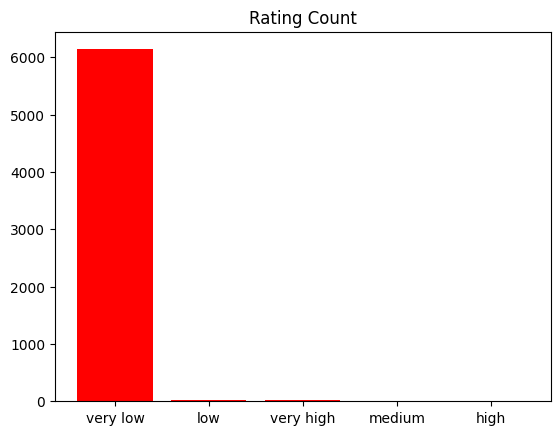

In [667]:
# Rating Count
value_counts = categorical_rating_count.value_counts()
values = value_counts.index.astype(str)
plt.bar(values, value_counts.values, color='red')
plt.title('Rating Count')
plt.show()

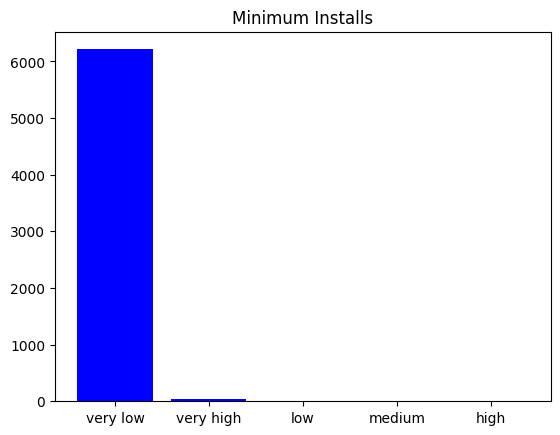

In [668]:
# Minimum Installs
value_counts = categorical_min_installs.value_counts()
values = value_counts.index.astype(str)
plt.bar(values, value_counts.values, color='blue')
plt.title('Minimum Installs')
plt.show()

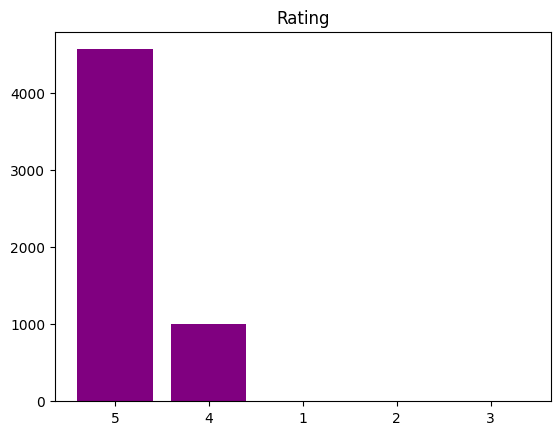

In [669]:
# Rating
value_counts = categorical_rating.value_counts()
values = value_counts.index.astype(str)
plt.bar(values, value_counts.values, color='purple')
plt.title('Rating')
plt.show()

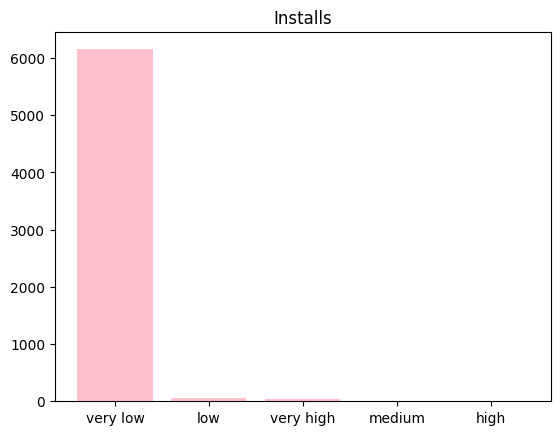

In [670]:
# Installs
value_counts = categorical_installs.value_counts()
values = value_counts.index.astype(str)
plt.bar(values, value_counts.values, color='pink')
plt.title('Installs')
plt.show()

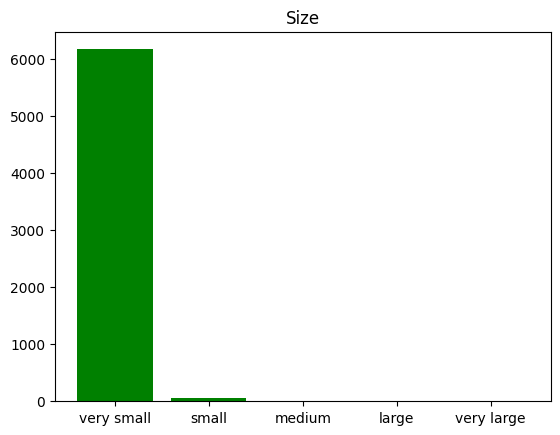

In [671]:
# Size
value_counts = categorical_size.value_counts()
values = value_counts.index.astype(str)
plt.bar(values, value_counts.values, color='green')
plt.title('Size')
plt.show()

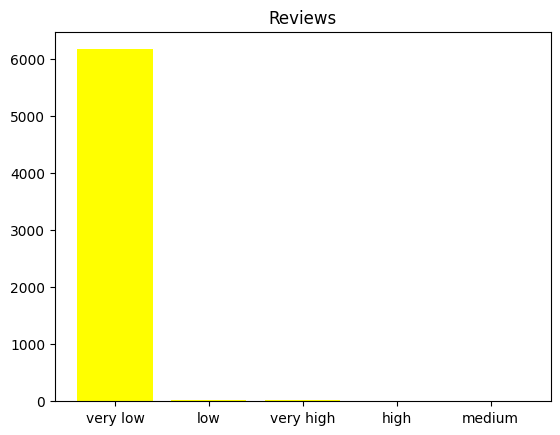

In [672]:
# Reviews
value_counts = categorical_reviews.value_counts()
values = value_counts.index.astype(str)
plt.bar(values, value_counts.values, color='yellow')
plt.title('Reviews')
plt.show()

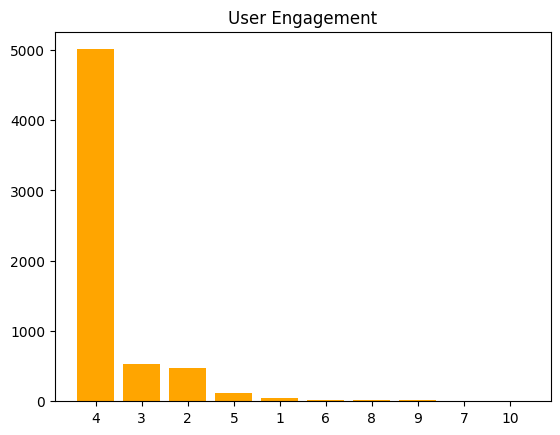

In [673]:
# User Engagement
value_counts = categorical_user_eng.value_counts()
values = value_counts.index.astype(str)
plt.bar(values, value_counts.values, color='orange')
plt.title('User Engagement')
plt.show()

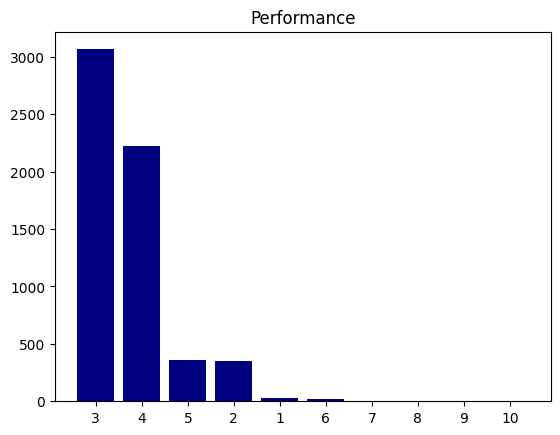

In [674]:
# Performance
value_counts = categorical_performance.value_counts()
values = value_counts.index.astype(str)
plt.bar(values, value_counts.values, color='navy')
plt.title('Performance')
plt.show()

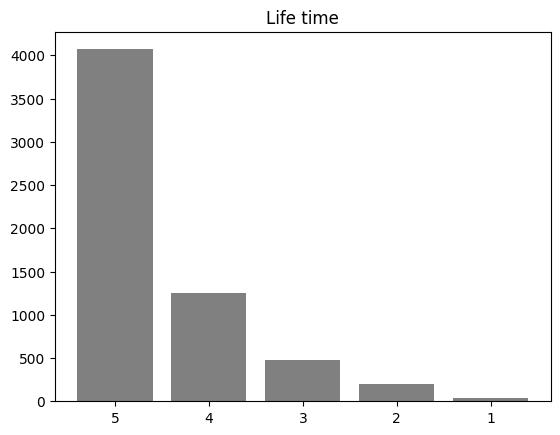

In [675]:
# Life time
value_counts = categorical_life_time.value_counts()
values = value_counts.index.astype(str)
plt.bar(values, value_counts.values, color='grey')
plt.title('Life time')
plt.show()

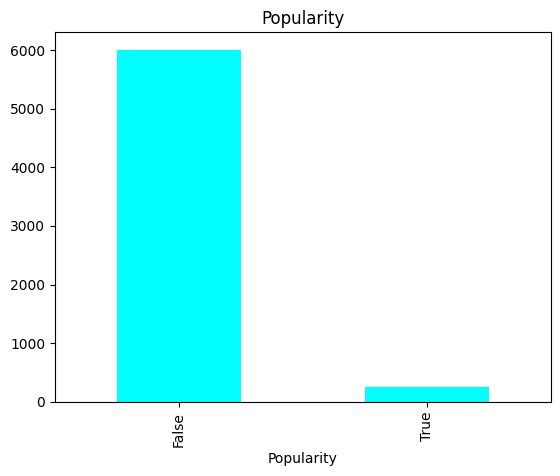

In [676]:
# Popularity
merged_df['Popularity'].value_counts().plot(kind='bar', color='aqua')
plt.title('Popularity')
plt.show()

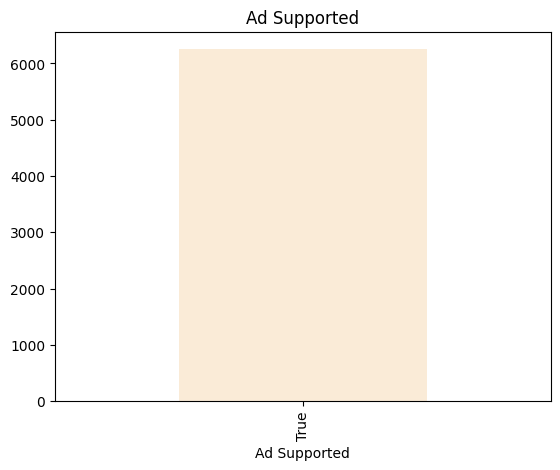

In [677]:
# Ad Supported
merged_df['Ad Supported'].value_counts().plot(kind='bar', color='antiquewhite')
plt.title('Ad Supported')
plt.show()

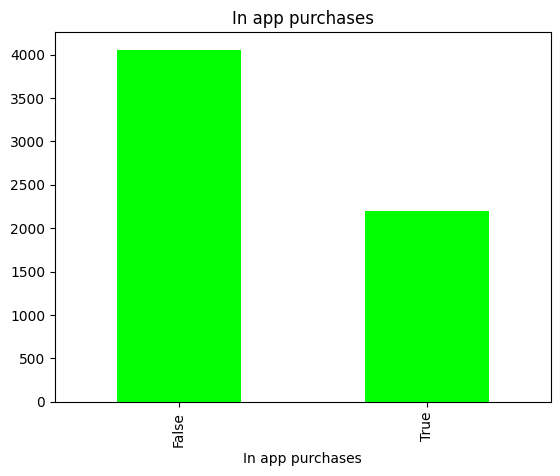

In [678]:
# In app purchases
merged_df['In app purchases'].value_counts().plot(kind='bar', color='lime')
plt.title('In app purchases')
plt.show()

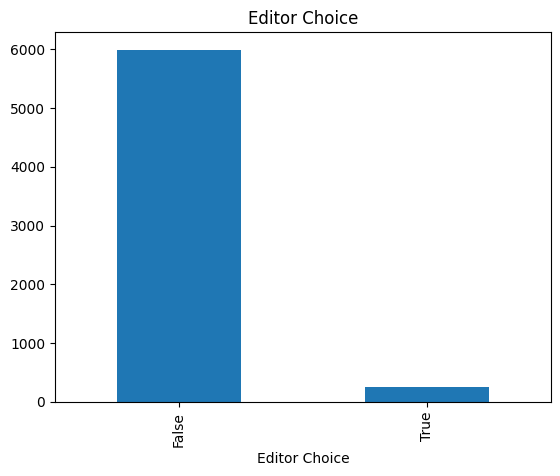

In [679]:
# Editor Choice
merged_df['Editor Choice'].value_counts().plot(kind='bar')
plt.title('Editor Choice')
plt.show()

### Parallel Coordinates Plot

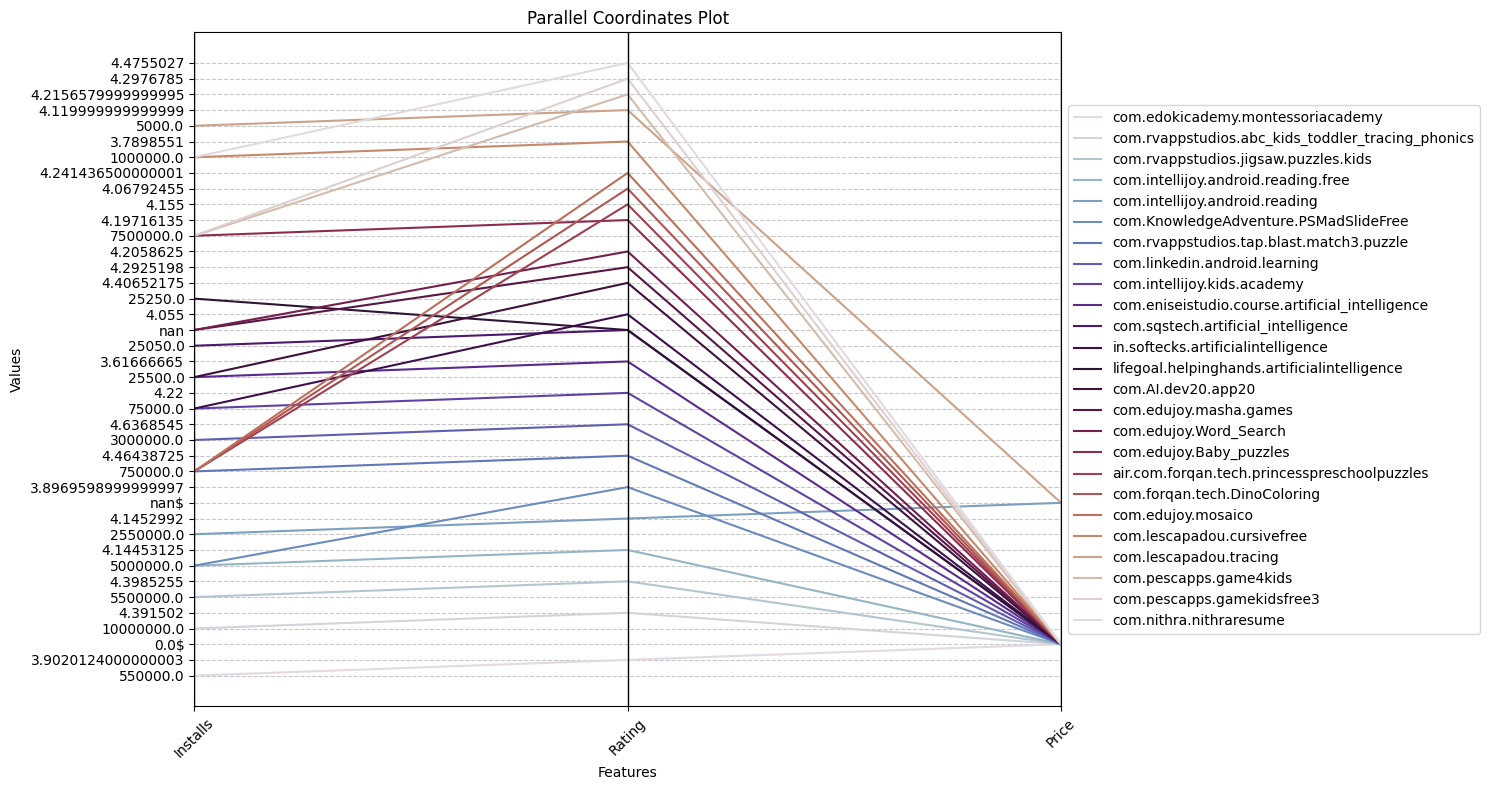

In [680]:
md = pd.DataFrame()
# Convert numerical columns to string
md['App Id'] = reduced_df['App Id'][0:25].astype(str)
md['Installs'] = reduced_df['Installs'][0:25].astype(str)
md['Rating'] = reduced_df['Rating'][0:25].astype(str)
md['Price'] = reduced_df['Price'][0:25].astype(str)
# Reduce the figure size to limit the image size
plt.figure(figsize=(15, 8))  # Adjust the size as needed
parallel_coordinates(md, 'App Id', colormap='twilight')
plt.title('Parallel Coordinates Plot')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Radar Diagram

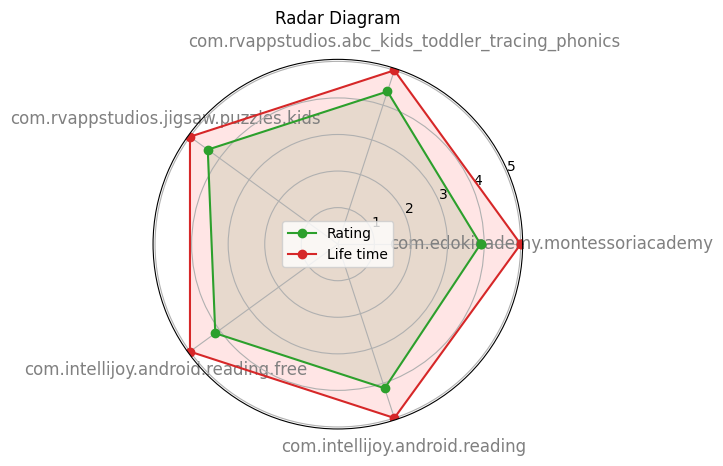

In [681]:
app_count = 5
fig = plt.figure()
ax = fig.add_subplot(111, projection="polar")
theta = np.arange(app_count + 1) / float(app_count) * 2 * np.pi
ratings = merged_df['Rating'][0:5].values
installs = merged_df['Life time'][0:5].values
ratings = np.append(ratings, ratings[0])
installs = np.append(installs, installs[0])

# Plot ratings
l1, = ax.plot(theta, ratings, color="C2", marker="o", label="Rating")

# Plot installs
l2, = ax.plot(theta, installs, color="C3", marker="o", label="Life time")
# Customize ticks
plt.xticks(theta[:-1], merged_df['App Id'][0:5], color='grey', size=12)
ax.tick_params(pad=10)

# Fill area
ax.fill(theta, ratings, 'green', alpha=0.1)
ax.fill(theta, installs, 'red', alpha=0.1)

# Add legend
plt.legend(handles=[l1, l2])
plt.title('Radar Diagram')
plt.show()

# Phase 1-2

#### Multi-Schema 

- For merging datasets, column 'Type' in googleplay dataset, indicates that app is free or paid while in playstore dataset, column 'Free' shows that with True and False.
- For merging datasets, column 'Category' in googleplay dataset and playstore dataset have some differences for example there is value 'Travel & Local' in category of playstore is equivalent to 'TRAVEL_AND_LOCAL' in category of googleplay dataset.
-  For merging datasets, in playstore dataset there are columns 'Price' and 'Currency' but in googleplay dataset there isn't column 'Currency' and values store by its currencies like '4.99$' and if currency sign for values in price of googleplay dataset is omitted, we can't match currencies easily. 
        

#### Multi-Instance 

- There are duplicate records that we reduce them based on repetitive App Id.
- Same columns in googleplay dataset and playstore dataset, had different values. To solve it, we picked reference value (the value in playstore dataset) or we calculated mean of them.
